## Cálculo do Retorno de uma Carteira de Ações


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

Definição dos ativos financeiros e seus pesos (%) nas carteiras Brasileira e Americana.

In [14]:
br_tickers_n_weights = (
    ("WEGE3.SA", 0.0714),
    ("ARZZ3.SA", 0.0286),
    ("LREN3.SA", 0.0286),
    ("GRND3.SA", 0.0286),
    ("ABEV3.SA", 0.0500),
    ("MDIA3.SA", 0.0500),
    ("SLCE3.SA", 0.0500),
    ("PSSA3.SA", 0.0714),
    ("B3SA3.SA", 0.0500),
    ("ITUB3.SA", 0.0714),
    ("BBAS3.SA", 0.0714),
    ("RADL3.SA", 0.0500),
    ("ODPV3.SA", 0.0286),
    ("FLRY3.SA", 0.0286),
    ("HYPE3.SA", 0.0286),
    ("VIVT3.SA", 0.0500),
    ("SAPR3.SA", 0.0286),
    ("CPFE3.SA", 0.0714),
    ("EGIE3.SA", 0.0714),
    ("EQTL3.SA", 0.0714),
)

usa_tickers_n_weights = (
    ("MMM", 0.03571428571),
    ("WST", 0.03571428571),
    ("PG", 0.03571428571),
    ("JPM", 0.03571428571),
    ("TXN", 0.03571428571),
    ("ROST", 0.03571428571),
    ("JNJ", 0.03571428571),
    ("PAYX", 0.03571428571),
    ("FAST", 0.03571428571),
    ("EXPD", 0.03571428571),
    ("NKE", 0.03571428571),
    ("DIS", 0.03571428571),
    ("TTC", 0.03571428571),
    ("AAPL", 0.03571428571),
    ("UNH", 0.03571428571),
    ("ADBE", 0.03571428571),
    ("GOOGL", 0.03571428571),
    ("COST", 0.03571428571),
    ("ANSS", 0.03571428571),
    ("HD", 0.03571428571),
    ("ACN", 0.03571428571),
    ("BLK", 0.03571428571),
    ("MSFT", 0.03571428571),
    ("VNQ", 0.03571428571),
    ("VOO", 0.03571428571),
    ("VIOV", 0.03571428571),
    ("VBR", 0.03571428571),
    ("VPL", 0.03571428571),
)

br_index_ticker = "^BVSP"

usa_index_ticker = "^GSPC"

Download dos dados dos ativos financeiros a partir do Yahoo Finance a partir de 02/02/2011.

In [15]:
br_stock_data = pd.DataFrame()
br_index_data = pd.DataFrame()
usa_stock_data = pd.DataFrame()
usa_index_data = pd.DataFrame()
start_date: str = "2011-02-02"
# start_date: str = "2022-01-01"
end_date: str = datetime.now().strftime("%Y-%m-%d")

for t in br_tickers_n_weights:
    ticker: str = t[0]
    br_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

for t in usa_tickers_n_weights:
    ticker: str = t[0]
    usa_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

br_index_data[br_index_ticker]: dict = yf.download(
    br_index_ticker, progress=False, start=start_date, end=end_date
)["Adj Close"]

usa_index_data[usa_index_ticker]: dict = yf.download(
    usa_index_ticker,
    progress=False,
    start=start_date,
    end=end_date,
)["Adj Close"]

---


### Gráficos

Gráfico Normalizado das Ações Brasileiras:

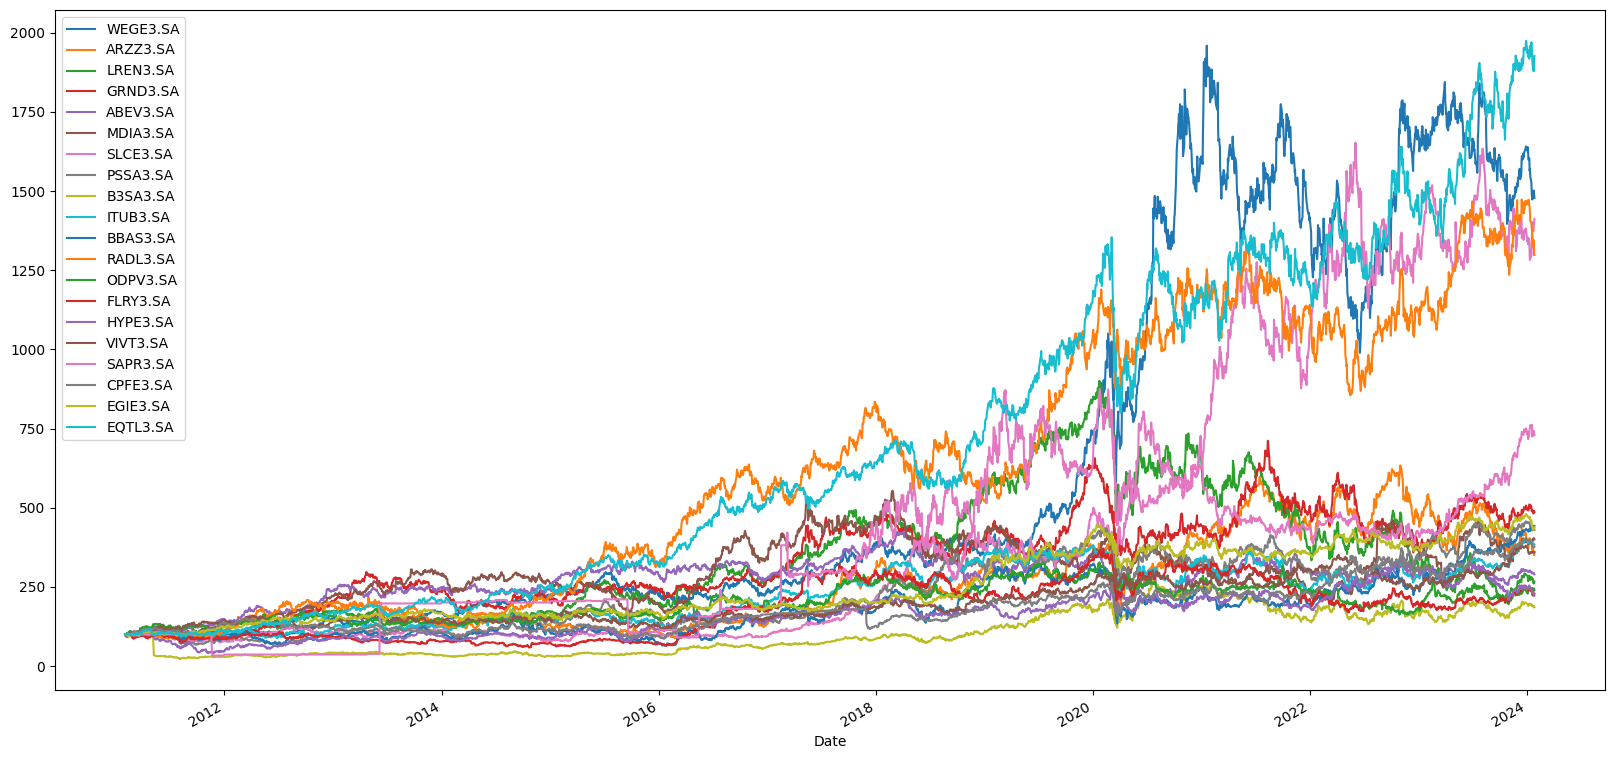

In [16]:
(br_stock_data / br_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado do Índice Brasileiro:

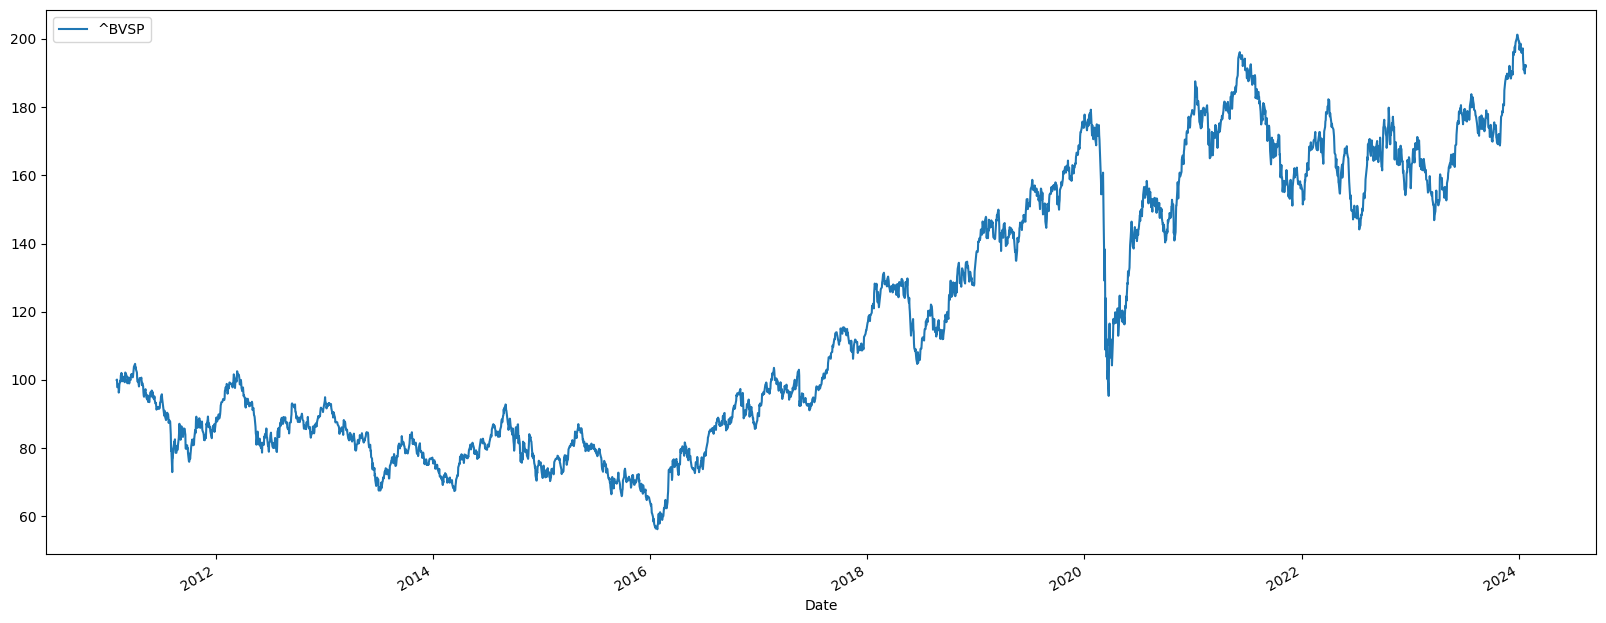

In [17]:
(br_index_data / br_index_data.iloc[0] * 100).plot(figsize=(20, 8))
plt.show()

Gráfico Normalizado das Ações Americanas:

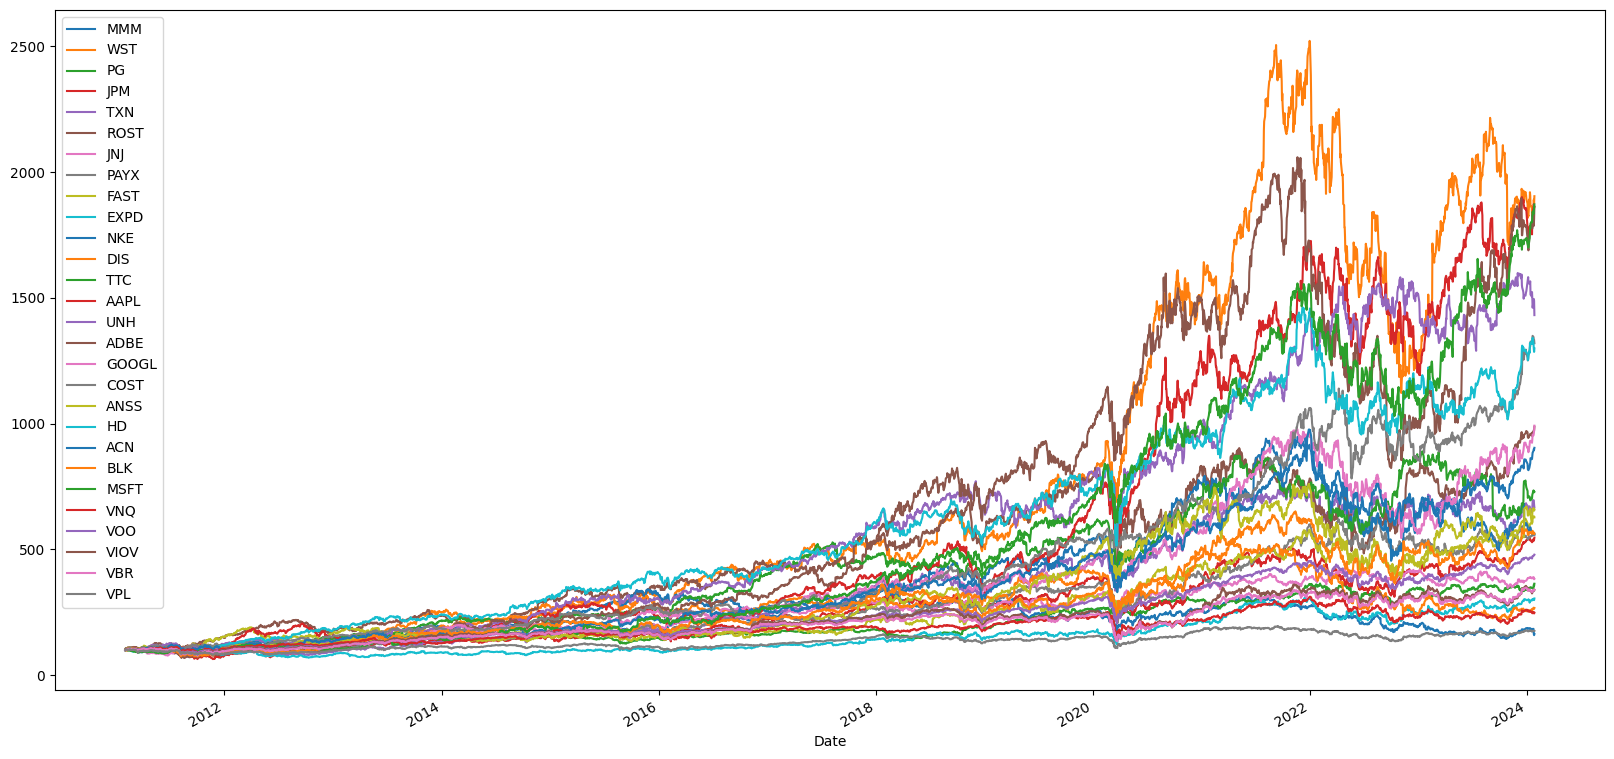

In [18]:
(usa_stock_data / usa_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado do Índice Americano:

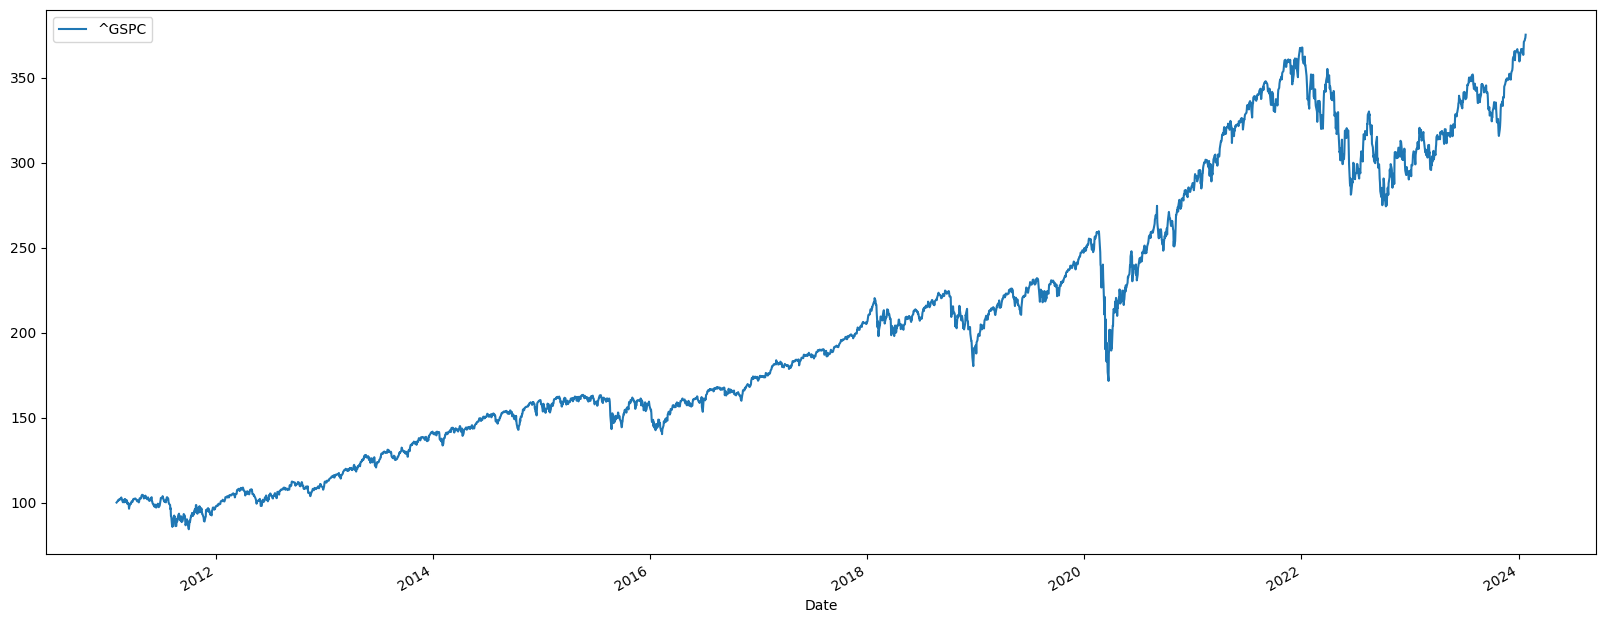

In [19]:
(usa_index_data / usa_index_data.iloc[0] * 100).plot(figsize=(20, 8))
plt.show()

---


### Calculando o Retorno Médio de uma Carteira de Ações


Calcular o retorno simples dos ativos financeiros da carteira e armazenar os resultados em uma nova tabela.


In [20]:
br_index_returns = (br_index_data / br_index_data.shift(1)) - 1
br_stock_returns = (br_stock_data / br_stock_data.shift(1)) - 1

usa_index_returns = (usa_index_data / usa_index_data.shift(1)) - 1
usa_stock_returns = (usa_stock_data / usa_stock_data.shift(1)) - 1

Armazenar os pesos dos ativos financeiros das carteiras para que se possa calcular o produto escalar dos retornos anuais com seus respectivos pesos.


In [21]:
br_weights = np.array([tw[1] for tw in br_tickers_n_weights])
usa_weights = np.array([tw[1] for tw in usa_tickers_n_weights])

Calcular e exibir a rentabilidade média anual de cada ativo financeiro da carteira Brasileira.

In [22]:
br_index_annual_returns = br_index_returns.mean() * 250
br_stock_annual_returns = br_stock_returns.mean() * 250
br_stock_annual_returns

WEGE3.SA    0.259357
ARZZ3.SA    0.178052
LREN3.SA    0.149210
GRND3.SA    0.172155
ABEV3.SA    0.116532
MDIA3.SA    0.164046
SLCE3.SA    0.269887
PSSA3.SA    0.157981
B3SA3.SA    0.150383
ITUB3.SA    0.147945
BBAS3.SA    0.197164
RADL3.SA    0.248830
ODPV3.SA    0.117196
FLRY3.SA    0.114496
HYPE3.SA    0.118263
VIVT3.SA    0.139139
SAPR3.SA    0.506317
CPFE3.SA    0.142138
EGIE3.SA    0.142504
EQTL3.SA    0.266041
dtype: float64

Calcular e exibir a rentabilidade média anual de cada ativo financeiro da carteira Americana.

In [23]:
usa_index_annual_returns = usa_index_returns.mean() * 250
usa_stock_annual_returns = usa_stock_returns.mean() * 250
usa_stock_annual_returns

MMM      0.063278
WST      0.262128
PG       0.114013
JPM      0.168447
TXN      0.181527
ROST     0.219787
JNJ      0.117266
PAYX     0.157339
FAST     0.179748
EXPD     0.114550
NKE      0.170501
DIS      0.109541
TTC      0.181700
AAPL     0.263864
UNH      0.235423
ADBE     0.272316
GOOGL    0.212407
COST     0.218523
ANSS     0.182484
HD       0.223838
ACN      0.198097
BLK      0.170635
MSFT     0.258411
VNQ      0.090623
VOO      0.135059
VIOV     0.118601
VBR      0.115778
VPL      0.057991
dtype: float64

Calcular o produto escalar dos retornos anuais e seus pesos, em seguida, exibir o resultado percentual.


In [24]:
for i in (
    (
        "Rentabilidade Média Anual do Portfólio BR:",
        br_stock_annual_returns,
        br_weights,
    ),
    ("Rentabilidade Média Anual do Índice BR:", br_index_annual_returns, [1]),
    (
        "\nRentabilidade Média Anual do Portfólio USA:",
        usa_stock_annual_returns,
        usa_weights,
    ),
    ("Rentabilidade Média Anual do Índice USA:", usa_index_annual_returns, [1]),
):
    produto_escalar = np.dot(i[1], i[2])
    result = "{0:.2f} %".format(round(produto_escalar, 5) * 100)
    print(i[0], result)

Rentabilidade Média Anual do Portfólio BR: 18.70 %
Rentabilidade Média Anual do Índice BR: 8.05 %

Rentabilidade Média Anual do Portfólio USA: 17.12 %
Rentabilidade Média Anual do Índice USA: 11.65 %


O retorno desta carteira é satisfatório?
